Professor: **Andrea Vicere'**
##### Student
Last Name: **Grasso** \
First Name: **Luca** \
ID:         **294612** \
Exam: **Numerical Simulation**

# Predator-prey models, and Hopf bifurcations

In a dynamical system, one encounters a *Hopf bifurcation* at a certain _critical point_, identified by some value of the parameters, when the system moves from a stability solution to an instability, characterized by the emergence of some periodic solution.

This is a phenomenon occurring in several systems: we will consider a simplified predator-prey model in which $x(t)$ represents the _prey_ population, and $y(t)$ represents the _predator_ population. Both populations depend on time $t$, as they evolve interacting with each other.

## The system equation

This is a special predator-prey model in which the appetite of the predator may be _satiated_ if the prey is abundant. Once the predator is satiated, an increase in the number of preys has little effect on the number of predators.

We choose a specific form of the model

$$\begin{eqnarray}
x^\prime(t)\equiv\frac{d x(t)}{d t} &=& (1 - x) x - \frac{x y}{0.3 + \alpha x} \\
y^\prime(t)\equiv\frac{d y(t)}{d t} &=& - 0.5 y + \frac{x y}{0.3 + \alpha x}
\end{eqnarray}$$

in which $\alpha$ is the parameter representing the **satiation constant**. The larger $\alpha$, the more quickly a predator's appetite is satiated as the prey population increases.

The quantities $x(t)$ and $y(t)$ are meaningful only for values $\ge 0$, hence the study of the system is confined to one quadrant of the plane, where $x(t)\ge 0$ and $y(t) \ge 0$.

At $\alpha = 0$ there is no satiation effect, and all the trajectories starting somewhere in the allowed quadrant describe a spiraling curve towards a stable fixed point.

As $\alpha$ increases, at a certain critical value the stable solution destibilizes, and periodic solutions (orbits) emerge, which serve as attractors (namely, regardless of the starting point, one ends on the same orbit).

Continuing to increase $\alpha$, the orbits start shrinking and again one has that the trajectories form a spiral which tents to a fixed point.








## Assignment #1

A useful way to understand the behaviour of the system is to observe that the vector $(x^\prime, y^\prime)$ is a function of the position $(x, t)$ in the plane $X, Y$.

In other words, $(x^\prime, y^\prime)$ is a _vector field_, a  quantity that at each position $(x, y)$, representing the status of the system, indicates a direction, towards which the system evolves in time.

To visualize this vector field, write a function taking in input two intervals $[x_{min}, x_{max}], [y_{min}, y_{max}]$,  the number of points $N_x, N_y$ along each direction, the value of the parameter $\alpha$, and produces a two-dimensional image of the vector field: in other words, the function defines a grid of positions in the plane $X, Y$, within the given intervals; at each position, an arrow is drawn representing the vector field.

Try visualizing the vector field for different values of $\alpha=0.0, 0.5, 0.85, 0.9, 1.2, 1.35$, in the intervals $x\in (0.0, 1.0]$, $y\in (0.0, 1.0]$

**Note** you will find useful the functions `numpy.meshgrid` to define the grid, and `matplotlib.pyplot.quiver` to draw the vector field.

------------------------------------------------------------------------------------------------------------------------------

**I run analytical tests to familiarize myself with the function and then enter the assignment with a vector function**

In [1]:
#Librarie Caricate

%matplotlib notebook
%matplotlib inline

from matplotlib import rcParams
from scipy import integrate
from math import sin, cos, log, ceil

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import time

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 11

#from pylab import rcParams
import pylab as p

In [2]:
rcParams['figure.figsize'] = 10, 5

#First Fuction
def F_1(x, y, alpha):
    return x*( (1 - x) - (y / ( 0.3 + alpha * x)))
#Second Fuction
def F_2(x, y, alpha):
    return y * (-0.5 + (x / (0.3 + alpha * x))) 
 
def dX_dt(X, t , alpha):
    x, y = X
    dotx = F_1(x, y, alpha)
    doty = F_2(x, y, alpha)
    return np.array([dotx, doty])


In [3]:
def plot_odeint(x0, y0, alpha, Nt, tmax):
    
    t = np.linspace(0., tmax, Nt)
    X0 = [x0, y0]
    res = integrate.odeint(dX_dt, X0, t, args = (alpha,))
    x, y = res.T
    
    title = "odeint method" + " x0 = "  + "{0:.2f}".format(x0)  + ", y0 = " + "{0:.2f}".format(y0) + " alpha = "  + "{0:.2f}".format(alpha) 
    
    #Plot The solved
    plt.figure()
    plt.grid()
    plt.title(title)
    plt.plot(t, x, '-b', label = 'Predator')
    plt.plot(t, y, '-r', label = 'Prey')
    plt.legend(loc='upper right',fontsize="xx-small")
    plt.xlabel('Time t, [days]')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

**With this function, I can try to analyze the various X and Y curves given a point in time set for alpha value at will with the analytic method provided via scipy's integral**

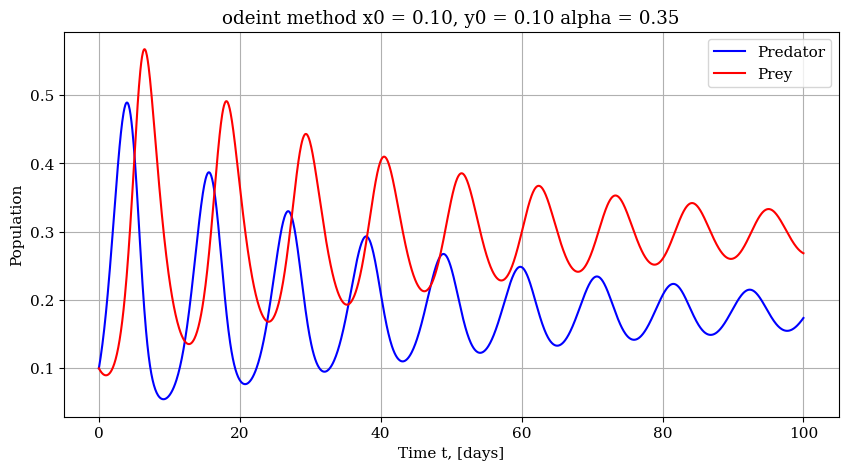

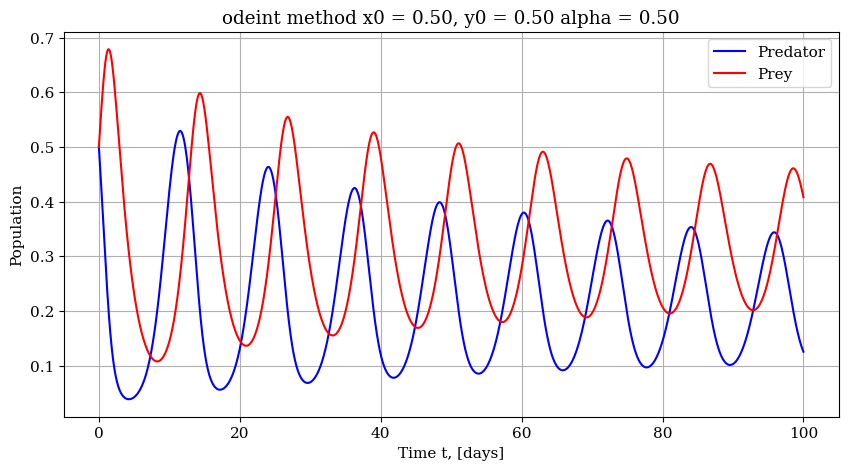

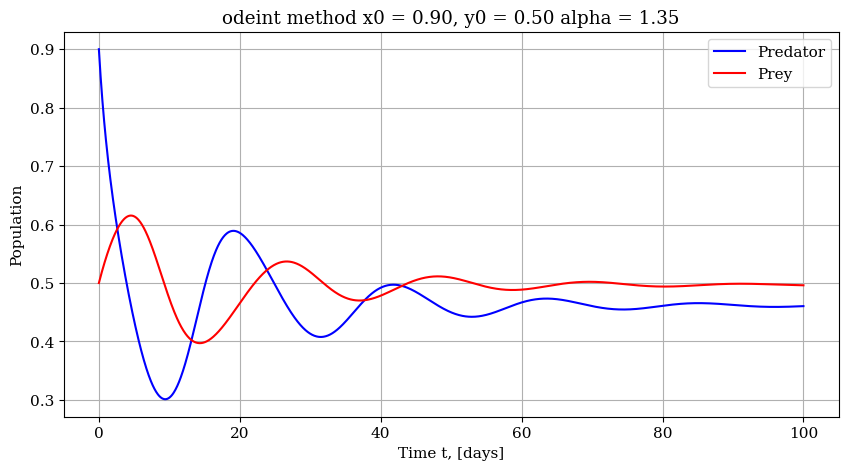

In [4]:
# plot_odeint(x0, y0, alpha, Nt, tmax):
# ------------------------------------
# x0 = Value of X point --------- float
# y0 = Value of Y point --------- float
# alpha = value of alpha -------- float
# Nt = number of step of time --- int
# tmax = last value of t -------- float

## Example of DEFAULT VALUE
#x0 = 0.1
#y0 = 0.1
#alpha = 0.35
#Nt = 1600
#tmax = 180.


plot_odeint(0.1, 0.1, 0.35, 1600, 100.)
plot_odeint(0.5, 0.5, 0.5,  1600, 100.)
plot_odeint(0.9, 0.5, 1.35, 1600, 100.)

In [5]:
rcParams['figure.figsize'] = 10, 8

def plot_ode_alphas(x0, y0, alphas, Nt, tmax):
    
    t = np.linspace(0., tmax, Nt)
    X0 = [x0, y0]
    
    title = "alphas solved for " + " x0 = "  + "{0:.2f}".format(x0)  + ", y0 = " + "{0:.2f}".format(y0) 
    
    nums = np.random.random((10, len(alphas)))
    colors = cm.rainbow(np.linspace(0, 2, nums.shape[0]))  # generate the colors for each data set
    

    fig, ax = plt.subplots(2,1, constrained_layout = True)
    
    for alpha, i in zip(alphas, range(len(alphas))):
        res = integrate.odeint(dX_dt, X0, t, args = (alpha, ))
        ax[0].plot(t, res[:,0], color = colors[i],  linestyle = '-', label = r"$\alpha = $" + "{0:.2f}".format(alpha))
        ax[1].plot(t, res[:,1], color = colors[i],  linestyle = '-', label = r"$\alpha = $" + "{0:.2f}".format(alpha))
        ax[0].legend(loc='upper right',fontsize="xx-small")
        ax[1].legend(loc='upper right',fontsize="xx-small")

    ax[0].set_title('Predator:' + title) 
    ax[0].grid()
    ax[0].set_xlabel('Time t, [days]')
    ax[0].set_ylabel('Predator X')

    ax[1].set_title('Prey:' + title) 
    ax[1].grid()
    ax[1].set_xlabel('Time t, [days]')
    ax[1].set_ylabel('Prey Y');
    
    # set the spacing between subplots with iteration live
    #plt.subplot_tool()



- [ITA] 
Notiamo che la funzione tende a perdere il modo armonioso in prossimità di alpha 1.35, con alpha in un valore mediano, sembra mantere la sua ciclicità, invece ad alpha nullo sembrà trovare un equilibrio come nel tempo ridursi.
Con le prossime funzioni cerchiamo di capire meglio questo sistema. 

- [ENG] 
We note that the function tends to lose its harmonious mode near alpha 1.35, with alpha in a median value, it seems to maintain its cyclicity, instead at zero alpha it will seem to find a balance as it decreases over time.
With the next functions we try to better understand this system.

**With this function, I put all the curves with alpha assigned in parallel, to get an idea of ​​the trend and to verify that at the extremes of the parameters alpha 0 and alpha 1.35 the curve attenuates.**


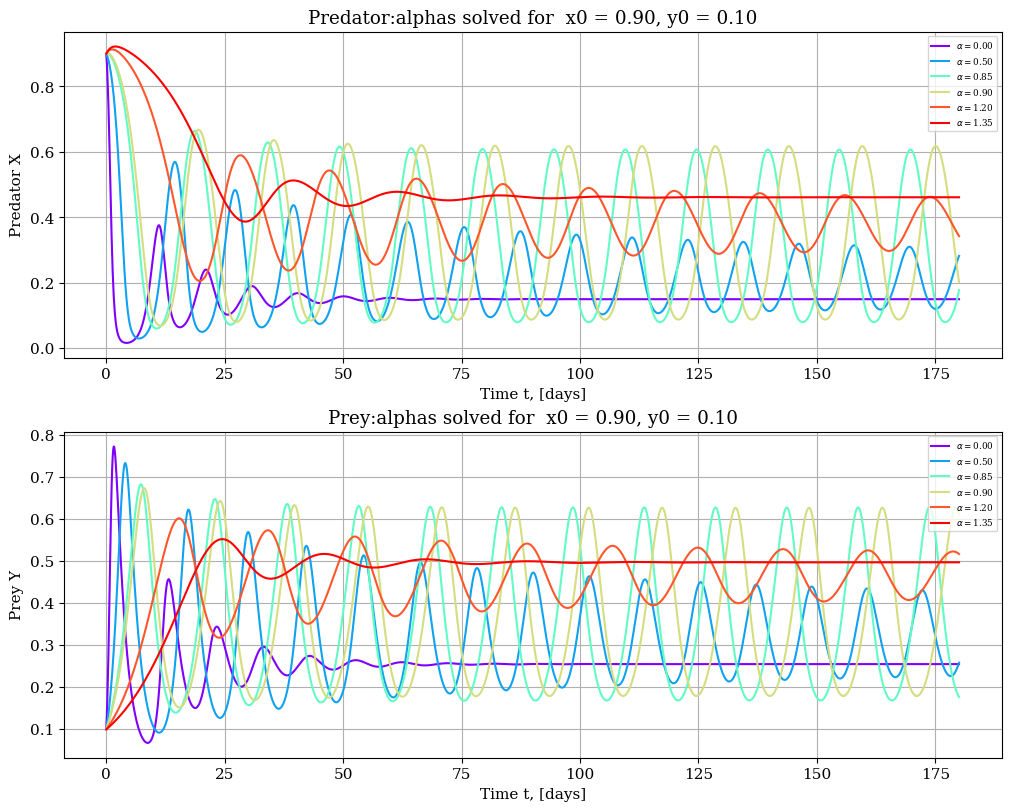

In [6]:
#alpha value by assignement -----> attetion it s a list needs n >= 2
alphas = (0.0, 0.5, 0.85, 0.9, 1.2, 1.35)


#plot_ode_alphas(x0, y0, alphas, Nt, tmax):
# x0 = Value of X point --------- float
# y0 = Value of Y point --------- float
# alphas = list of costants ----- list(float)
# Nt = number of step of time --- int
# tmax = last value of t -------- float

plot_ode_alphas(0.9, 0.1, alphas, 1600, 180.)

In [7]:

rcParams['figure.figsize'] = 9.5, 9.5


def vector_assignement1(Nx, Ny, X0, X,  Y, alpha, t, coeff):
    import pylab as p
    
    plt.figure()

    #-------------------------------------------------------
    # plot trajectories
    
    X_i = integrate.odeint( dX_dt, X0, t, args = (alpha,)) # we don't need infodict here
    p.plot (X0[0], X0[1], lw=2, color='green', marker='o')
    p.plot( X_i[:,0], X_i[:,1], lw=2, color='green', label='X0=(%.2f, %.2f)' % ( X0[0], X0[1]) )
    
    
    #abscissa x
    x = np.linspace( X[0] - coeff, X[1] + coeff, Nx)
    #abscissa y
    y = np.linspace( Y[0] - coeff, Y[1] + coeff, Ny)

    #matrix  x  y
    X1 , Y1 = np.meshgrid(x, y)           # create a grid
    DX1, DY1 = dX_dt([X1, Y1],t, alpha)   # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))              # Norm of the growth rate 
    M[ M == 0] = 1.                       # Avoid zero division errors
    
    # Normalize each arrows
    DX1 /= M                              
    DY1 /= M
    
    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
    # the growth speed
    p.title('Trajectories and direction fields with scipy ODEINT for ALPHA = %.2f' % alpha)
    Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
    p.xlabel('Predator X')
    p.ylabel('Prey Y')
    p.legend()
    p.grid()
    p.xlim(X[0] - coeff, X[1] + coeff)
    p.ylim(Y[0] - coeff, Y[1] + coeff)
    
    #f2.savefig('predator_and_prey_1.png')    #if you want save the plot - campo per salvare 

### Solved Assignement 1

**I created the function with the call to scipy.odeint inside for the parameters of assignment 1 and it works perfectly, but within the required limits. This function will be optimized and adapted according to subsequent assignments and according to the study of the system.**

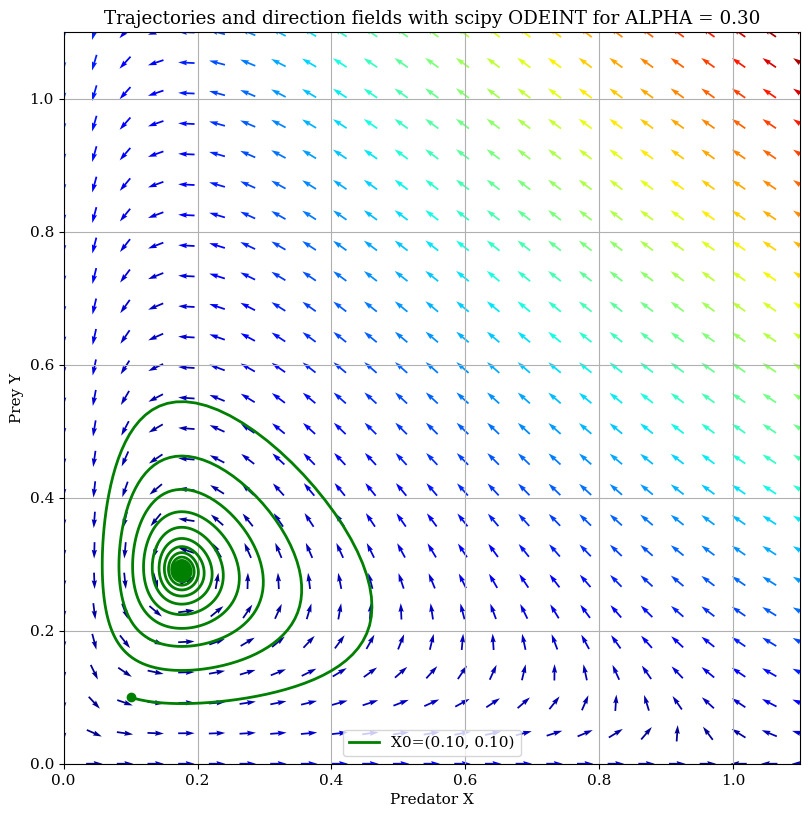

In [8]:
#Value
# Nx,Ny, number of point for the grid

## DEFAULT VALUE

#alpha = 0.35
#Nt = 1600
#tmax = 180.

# vector_assignement1(Nx, Ny, X0, X,  Y, alpha, t, coeff):
# Nx points for vector X
# Ny points for vector Y
# X0 points start
# X range of  xmin xmax for plot
# Y range of  ymin ymax for plot
# alpha is a variable of Sistem
# coeff is arbitrit value for give margin of graf is a positive value, best value is a delta X or Y

Nt = 1600
tmax = 180.
t = np.linspace(0., tmax, Nt)

x_min = 0.1
x_max = 1.0

y_min = 0.1
y_max = 1.0

coeff = 0.1

Nx = 25
Ny = 25

X  = [x_min, x_max]
Y  = [y_min, y_max]
X0 = [0.1, 0.1]
alpha = 0.3
vector_assignement1(Nx, Ny, X0, X, Y, alpha, t, coeff)

## Assignment 2

**A.** Write a function which takes in input initial conditions $x(0), y(0)$, the parameter $\alpha$, a time interval $T$ and a time step $\Delta t$, and returns the evolution of the system, namely the values $x_i = x(i \Delta t), y_i = y(i \Delta t)$ at the discrete times $i \Delta t$, using the Euler integration method.

**B.** Evolve the system from the starting position $x(0) = 0.9, y(0) = 0.1$, and for the  values of $\alpha = [0.0, 0.5, 0.85, 0.9, 1.2, 1.35]$.
For a given value of $\alpha$, experiment with some values of the integration time $T$ and $\Delta t$ to try and reproduce the trajectories shown at [this page](http://faculty.sfasu.edu/judsontw/ode/html-20220730/nonlinear04.html) in figures 5.4.10, 5.4.11, 5.4.12.
You should show the final results by superimposing in the same figure the vector field obtained in Assignment 1 (which also depends on the value of $\alpha$) and the trajectories $x(t), y(t)$ obtained. 

**C.** Set now $\alpha = 0.9$ and $T$ at a value which allows evolving the system over several orbital periods (see fig 5.4.12 at [this page](http://faculty.sfasu.edu/judsontw/ode/html-20220730/nonlinear04.html)). Keep $T$ fixed but vary $\Delta t$ over at least two orders of magnitude (for instance take $\delta t = 0.1, 0.05, 0.01, 0.005, 0.001$). Adopt the smallest $\Delta t$ value as a better approximation of an _exact_ solution and study the convergence of the method, comparing the solutions in $L_2$ norm with the techniques discussed in lesson [02.04](https://blended.uniurb.it/moodle/mod/folder/view.php?id=440881) for computing the distance of solutions on different temporal grids.
You should be able to see the behaviour of the error as a function of $\Delta t$.

## Assignment 3

Write a function which performs the same integration as in Assignment 1, but using this time a 2nd order method of your choice. See for instance lesson  [02.04](https://blended.uniurb.it/moodle/mod/folder/view.php?id=440881).

Perform again steps B and C of Assignment 1. In particular at step C you should observe a 2nd order behaviour for the error as a function of $\Delta t$.

-------------------------------------------------------------------------------------------------------------------------------

In [9]:
def f(u, alpha):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    x = u[0]
    y = u[1]
    
    return np.array([F_1(x, y, alpha),
                        F_2(x, y, alpha)])


def euler_step(u, f, dt, alpha):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u, alpha)

def rk2_step(u, f, dt, alpha):
    """Returns the solution at the next time-step using 2nd-order Runge-Kutta.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        solution at the next time step.
    """
    u_star = u + 0.5 * dt *f(u, alpha)   
    return u + dt * f(u_star, alpha)

def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = int(np.ceil(N_fine/N_current))
    
    diffgrid = dt * np.sum( np.abs(\
            u_current[:,1]- u_fine[::grid_size_ratio,1])) 
    
    return diffgrid

In [10]:
# set time-increment and discretize the time
#T  = 180.0                          # final time
#dt = 0.01                           # set time-increment
#N  = int(T/dt) #+ 1                 # number of time-steps
#x0 = 0.9
#y0 = 0.1
#t0 = 0.
#alpha = 1.35

def u_euler(t0, T, dt, X0, alpha):
    #T                   # final time
    # dt                 # set time-increment
    N  = int(T/dt) #+ 1  # number of time-steps
    
    x0, y0 = X0
    
    # set initial conditions dimension
    u_euler = np.empty((N, 2))

    # initialize the array containing the solution for each time-step
    u_euler[0] = np.array([x0, y0])

    # use a for loop to call the function rk2_step()
    for n in range(N-1):
        u_euler[n + 1] = euler_step(u_euler[n], f, dt, alpha)

    time = np.linspace(0.0, T,N)
    
    return np.array([u_euler[:,0],
                        u_euler[:,1]])
  
def u_rk2(t0, T, dt, X0, alpha):
    # T                  # final time
    # dt                 # set time-increment
    N  = int(T/dt) #+ 1  # number of time-steps
    
    x0, y0 = X0

    # set initial conditions dimension
    u_rk2 = np.empty((N, 2))

    # initialize the array containing the solution for each time-step
    u_rk2[0] = np.array([x0, y0])

    # use a for loop to call the function rk2_step()
    for n in range(N-1):
        u_rk2[n + 1] = rk2_step(u_rk2[n], f, dt, alpha)

    time = np.linspace(0.0, T,N)
    
    return np.array([u_rk2[:,0],
                        u_rk2[:,1]])

In [11]:
def plot_t_method(t0, t, tmax, Nt, dt, X0, alpha, o):
    
    rcParams['figure.figsize'] = 9, 7.5
    
    N = int(tmax/dt)
    t_n = np.linspace(0., tmax, N)

    #x vs t and y vs t subplots
    plt.figure() 
    
    plt.subplot(211)
    plt.title('Predator / Prey populations over time')
    plt.ylabel('predator')
    plt.grid()
    plt.subplot(212)
    plt.xlabel('time')
    plt.ylabel('prey')
    plt.grid()
    
    #Plotting Commands for Euler approximation
    if o == 1 or o == 4 or o == 0:
        x_euler, y_euler = u_euler(t0, tmax, dt, X0 , alpha)
        
        plt.subplot(211)
        plt.plot(t_n,x_euler,lw=2,color='red',label='Euler')
        
        plt.subplot(212)
        plt.plot(t_n,y_euler,lw=2,color='red', label='Euler')
    

    #Plotting Commands for Runge-Kutta 2 approximation 
    if o == 2 or o == 5 or o == 0:
        x_rk2, y_rk2 = u_rk2(t0, tmax, dt, X0 , alpha)
        
        plt.subplot(211)
        plt.plot(t_n,x_rk2,lw=2,color='green',label='RK2')
        
        plt.subplot(212)
        plt.plot(t_n,y_rk2,lw=2,color='green',label='RK2')
    
    
    
    # Odeint 
    if o == 3 or o == 4 or o == 5 or o == 0:
        plt.subplot(212)
        t = np.linspace(0., tmax, Nt)
        X = integrate.odeint( dX_dt, X0, t, args = (alpha,))   
    
        plt.subplot(211)
        plt.plot(t, X[:,0], lw=1, color='yellow',label='ODEINT')
    
        plt.subplot(212)
        plt.plot(t, X[:,1], lw=1, color='yellow',label='ODEINT')
 
    plt.subplot(211)
    plt.legend(loc='upper right',fontsize="x-small")
    plt.subplot(212)
    plt.legend(loc='upper right',fontsize="x-small")

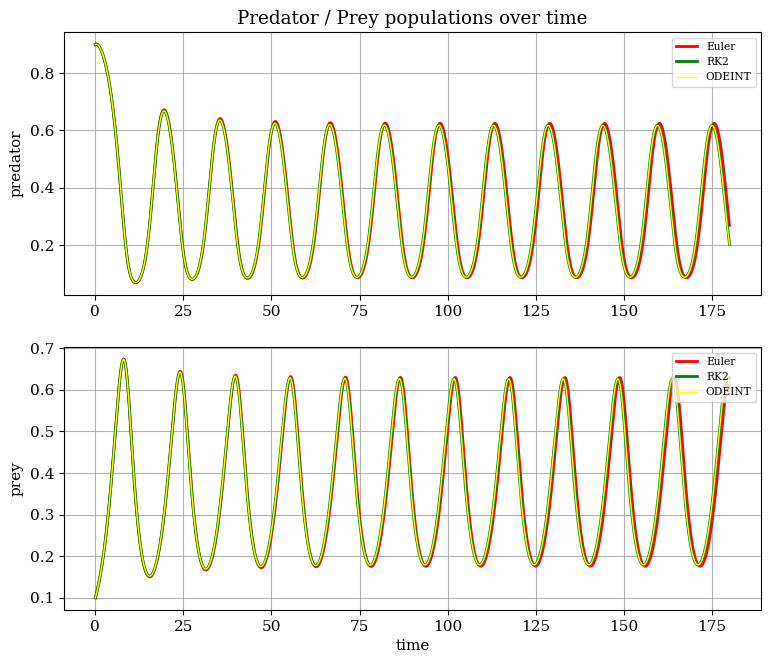

In [12]:
t0 = 0                        #initial time
Nt = 1600                     # for Odeint, number of step
tmax = 180.                   # T time max
dt = 0.01                     # for numerical dt step
t = np.linspace(0., tmax, Nt) # for Odeint array of dt

x_min = 0.1
x_max = 1.0
y_min = 0.1
y_max = 1.0

coeff = 0.1
o = 0

Nx = 25
Ny = 25

X  = [x_min, x_max ]
Y  = [y_min, y_max]

X0 = [0.9, 0.1]
alpha = 0.90
option = 0

plot_t_method(t0, t, tmax, Nt, dt, X0, alpha, option)

In [13]:
def u_euler(t0, T, dt, X0, alpha):
    #T                   # final time
    # dt                 # set time-increment
    N  = int(T/dt) #+ 1  # number of time-steps
    
    x0, y0 = X0
    
    # set initial conditions dimension
    u_euler = np.empty((N, 2))

    # initialize the array containing the solution for each time-step
    u_euler[0] = np.array([x0, y0])

    # use a for loop to call the function rk2_step()
    for n in range(N-1):
        u_euler[n + 1] = euler_step(u_euler[n], f, dt, alpha)

    time = np.linspace(0.0, T,N)
    
    return np.array([u_euler[:,0],
                        u_euler[:,1]])
  
def u_rk2(t0, T, dt, X0, alpha):
    #T                   # final time
    # dt                 # set time-increment
    N  = int(T/dt) #+ 1  # number of time-steps
    
    x0, y0 = X0

    # set initial conditions dimension
    u_rk2 = np.empty((N, 2))

    # initialize the array containing the solution for each time-step
    u_rk2[0] = np.array([x0, y0])

    # use a for loop to call the function rk2_step()
    for n in range(N-1):
        u_rk2[n + 1] = rk2_step(u_rk2[n], f, dt, alpha)

    time = np.linspace(0.0, T,N)
    
    return np.array([u_rk2[:,0],
                        u_rk2[:,1]])


In [14]:
from pylab import rcParams


def vector_assignement2(Nx, Ny, X0, X,  Y, alpha, t, Nt, tmax, dt, coeff, o):
    import pylab as p
    rcParams['figure.figsize'] = 9.5, 9.5
    
    t0 = 0.
    
    plt.figure()
    
    #-------------------------------------------------------
    # plot trajectories
    
    p.plot (X0[0], X0[1], lw=1, color='black', marker='o')
 
    # Euler method
    if o == 1 or o == 4 or o == 0:
        st = time.time()
        xpt, ypt = u_euler(t0, tmax, dt, X0 , alpha)                 
        p.plot( xpt, ypt, lw=2, color='red', label='X0=(%.2f, %.2f) - Euler' % ( X0[0], X0[1]) )
        et = time.time()
        elapsed_time = et - st
        print('Execution time for Euler:', elapsed_time, 'seconds')
        
    # RK2 method
    if o == 2 or o == 5 or o == 0:
        st = time.time()
        xpt, ypt = u_rk2(t0, tmax, dt, X0, alpha)        
        p.plot( xpt, ypt, lw=1, color='green', label='X0=(%.2f, %.2f) - RK2' % ( X0[0], X0[1]) )
        et = time.time()
        elapsed_time = et - st
        print('Execution time for RK2:', elapsed_time, 'seconds')
        
    # ODEINT method   
    if o == 3 or o == 4 or o == 5 or o == 0:
        st = time.time()
        X_i = integrate.odeint( dX_dt, X0, t, args = (alpha,))         # we don't need infodict here
        p.plot( X_i[:,0], X_i[:,1], lw=0.5, color='yellow', label='X0=(%.2f,  %.2f) - ODEINT' % ( X0[0], X0[1]) )
        et = time.time()
        elapsed_time = et - st
        print('Execution time for ODEINT:', elapsed_time, 'seconds')
        
    
    #abscissa x
    x = np.linspace( X[0] - coeff, X[1] + coeff, Nx)
    #abscissa y
    y = np.linspace( Y[0] - coeff, Y[1] + coeff, Ny)

    #matrix  x  y
    X1 , Y1 = np.meshgrid(x, y)           # create a grid
    DX1, DY1 = dX_dt([X1, Y1],t, alpha)   # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))              # Norm of the growth rate 
    M[ M == 0] = 1.                       # Avoid zero division errors
    # Normalize each arrows
    DX1 /= M                              
    DY1 /= M
    
    
    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
    # the growth speed
    p.title('Trajectories and direction fields with scipy ODEINT for ALPHA = %.2f' % alpha)
    Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
    p.xlabel('Predator X')
    p.ylabel('Prey Y')
    p.grid()
    p.xlim(X[0] - coeff, X[1] + coeff)
    p.ylim(Y[0] - coeff, Y[1] + coeff)
    p.legend(loc='upper right',fontsize="x-small")

Execution time for Euler: 0.06943964958190918 seconds
Execution time for RK2: 0.1294558048248291 seconds
Execution time for ODEINT: 0.005455970764160156 seconds


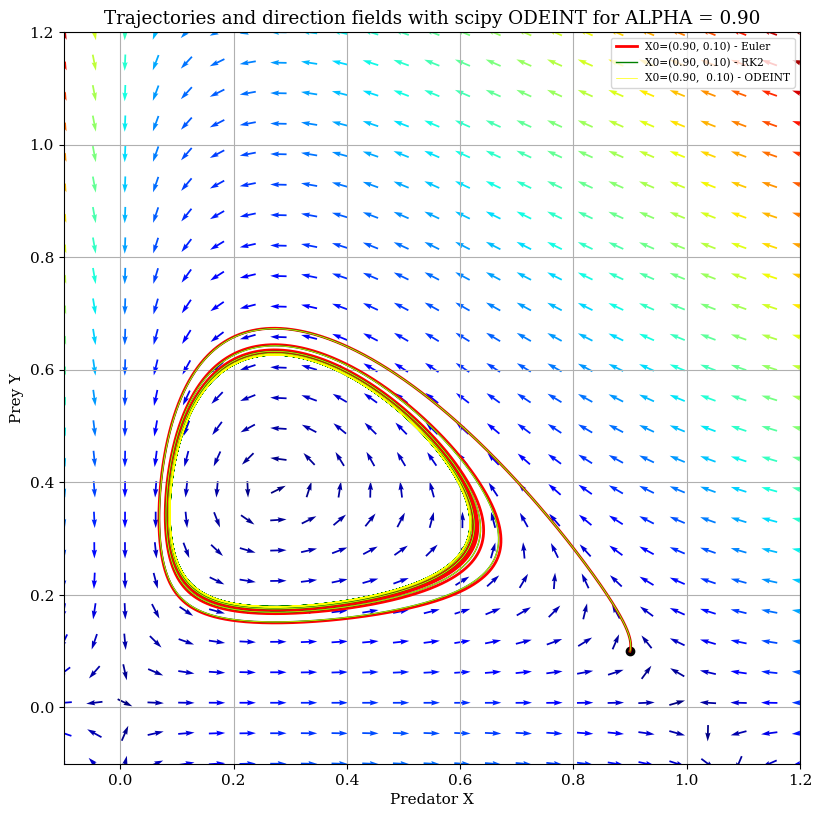

In [15]:
#Value
# Nx,Ny, number of point for the grid

## DEFAULT VALUE

#alpha = 0.35
#Nt = 1600
#tmax = 180.

# vector_assignement1(Nx, Ny, X0, X,  Y, alpha, t, coeff):
# Nx points for vector X
# Ny points for vector Y
# X0 points start
# X range of  xmin xmax for plot
# Y range of  ymin ymax for plot
# alpha is a variable of Sistem
# coeff is arbitrit value for give margin of graf is a positive value, best value is a delta X or Y
#Option 0 = ALL,  
#       1 = Euler, 
#       2 = RK42D, 
#       3 = odeint,
#       4 = Euler vs odeint
#       5 = RK2D vs odeint


Nt = 1600                       # for Odeint, number of step
tmax = 180.                     # T time max
dt = 0.01                        # for numerical dt step
t = np.linspace(0., tmax, Nt)   # for Odeint array of dt

x_min = 0.1
x_max = 1.0
y_min = 0.1
y_max = 1.0

coeff = 0.2
o = 0

Nx = 25
Ny = 25

X  = [x_min, x_max ]
Y  = [y_min, y_max]

X0 = [0.9, 0.1]
alpha = 0.90

vector_assignement2(Nx, Ny, X0, X,  Y, alpha, t, Nt, tmax, dt, coeff, o)


In [16]:
def u_value_calc(dt_value, algo, T, dt, X0, alpha, dim ):
    
    u_values = np.empty_like(dt_values, dtype = np.ndarray)
    x0, y0 = X0
    
    for i, dt in enumerate(dt_values):
    
        N = int(T/dt) #+1    # number of time-steps
        
    
        ### discretize the time t ###
        t = np.linspace(0.0, T, N)
    
        # initialize the array containing the solution for each time-step
        u = np.empty((N, dim))
        u[0] = np.array([x0, y0])

        # time loop
        
        if algo == 1:
            for n in range(N-1):
                u[n + 1] = euler_step(u[n], f, dt, alpha)
    
            # store the value of u related to one grid
            u_values[i] = u
        
        if algo == 2:
            for n in range(N-1):
                u[n + 1] = rk2_step(u[n], f, dt, alpha)
    
            # store the value of u related to one grid
            u_values[i] = u
        
    return u_values
    
    
def diffgrid_calc(u_values, dt_value):
  
    # compute diffgrid
    diffgrid = np.empty_like(dt_values)
    for i, dt in enumerate(dt_values):
        
        diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)
        
    return diffgrid




def plot_diffgrid(dt_values, diffgrid, algo):
    # plot using the matplotlib function loglog()
    plt.figure(figsize=(8,8))
    plt.grid(True)
    if algo == 1:
        plt.title('Euler',fontsize=18)
    if algo == 2:
        plt.title('RK2',fontsize=18)
    plt.xlabel(r'$\Delta t$', fontsize=18)
    plt.ylabel(r'$L_%.f$-norm of the grid differences' % algo, fontsize=18)
    plt.xlim(1e-4,3)
    plt.ylim(1e-4,3)
    plt.axis('equal')
    plt.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='--', lw=2, marker='o'); 
    
    
def check_convergence(r, h, algo, T, dt, X0, alpha, dim):
    dt_values = np.array([h, r*h, r**2*h])

    u_values = np.empty_like(dt_values, dtype=np.ndarray)

    for i, dt in enumerate(dt_values):
    
        N = int(T/dt) # +1    # number of time-steps
        x0, y0 = X0
    
        ### discretize the time t ###
        t = np.linspace(0.0, T, N)
    
        # initialize the array containing the solution for each time-step
        u = np.empty((N, dim))
        u[0] = np.array([x0, y0])

        # time loop
        if algo == 1:
            for n in range(N - 1):
                ### call euler_step() ###
                u[n + 1] = euler_step(u[n], f, dt, alpha)
        if algo == 2:
            for n in range(N - 1):
                ### call rk2_step() ###
                u[n + 1] = rk2_step(u[n], f, dt, alpha)
                
        # store the value of u related to one grid
        u_values[i] = u
        
    
    # calculate the order of convergence
    if algo == 1:
        alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
                 - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

        print('The order of convergence for Euler is alpha = {:.8f}'.format(alpha)) 
        
    if algo == 2:
        alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
                 - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

        print('The order of convergence for RK2 is alpha = {:.8f}'.format(alpha))  

The order of convergence for RK2 is alpha = 1.99934443


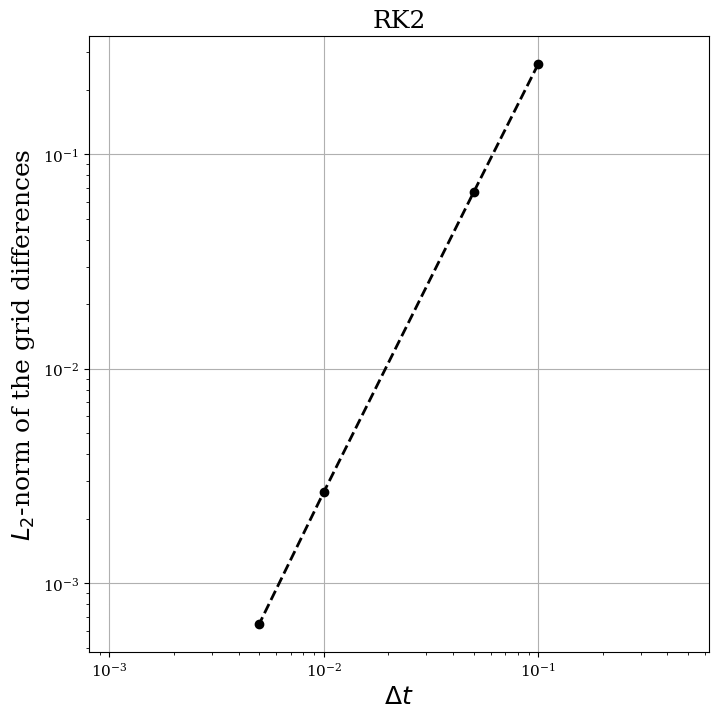

In [17]:
# use a for-loop to compute the solution on different grids
dt_values = np.array([0.1, 0.05, 0.01, 0.005, 0.001])

dim = 2  #Number of value of vector
algo = 2 #1 for Euler Step - 2 for R2K

u_values = u_value_calc(dt_values, algo, tmax, dt, X0, alpha, dim)
diffgrid = diffgrid_calc(u_values, dt_values)

# plot the solution
plot_diffgrid(dt_values, diffgrid, algo)

# check convergence rate
r = 2
h = 0.001
check_convergence(r, h, algo, tmax, dt, X0, alpha, dim)

## Assignment 4

**A.** Set $\alpha = 1.35$ and try a few different starting points $x(0), y(0)$ (at least four) to verify that all the trajectories converge on the same _fixed point_.

**B.** Set $\alpha = 0.9$ and try a few different starting points $x(0), y(0)$ (at least four) to verify that all the trajectories converge on the same _attractor orbit_.

To carry out this assignment it suffices to display in the same plot the different trajectories, starting from different starting points.
 
Use for this assigment the second order integrator implemented in Assignment 3.

In [18]:
def vector_assignement4(Nx, Ny, X0, X,  Y, alpha, t, Nt, tmax, dt, coeff, o):
    
    rcParams['figure.figsize'] = 9.5, 9.5
    
    t0 = 0.
    plt.figure()
    
    
    nums = np.random.random((10, len(X0)))                     # generate random number for color id
    colors = cm.rainbow(np.linspace(0, 2, nums.shape[0]))      # generate the colors for each data set
    
    
    for Xi, i in zip(X0, range(len(X0))):
        
        #-------------------------------------------------------
        # plot trajectories
        
        Xi = X0[i]
    
        p.plot (Xi[0], Xi[1], lw=1, color = colors[i], marker='o')
 
        # Euler method
        if o == 1 or o == 4 or o == 0:
            st = time.time()
            xpt, ypt = u_euler(t0, tmax, dt, Xi , alpha)                 
            p.plot( xpt, ypt, lw=1.5, color = colors[i], label='X0=(%.2f, %.2f) - Euler' % ( Xi[0], Xi[1]) )
            et = time.time()
            elapsed_time = et - st
            print('Execution time for Euler:', elapsed_time, 'seconds for Xi=(%.2f, %.2f)' % ( Xi[0], Xi[1]) )
        
        # RK2 method
        if o == 2 or o == 5 or o == 0:
            st = time.time()
            xpt, ypt = u_rk2(t0, tmax, dt, Xi, alpha)        
            p.plot( xpt, ypt, lw=1.5, color = colors[i], label='X%i =(%.2f, %.2f) - RK2' % (i, Xi[0], Xi[1]) )
            et = time.time()
            elapsed_time = et - st
            print('Execution time for RK2:', elapsed_time, 'seconds for X%i =(%.2f, %.2f)' % (i, Xi[0], Xi[1]) )
        
        # ODEINT method   
        if o == 3 or o == 4 or o == 5 or o == 0:
            st = time.time()
            X_i = integrate.odeint( dX_dt, Xi, t, args = (alpha,))         # we don't need infodict here
            p.plot( X_i[:,0], X_i[:,1], lw=1.5, color = colors[i], label='X0=(%.2f,  %.2f) - ODEINT' % ( Xi[0], Xi[1]) )
            et = time.time()
            elapsed_time = et - st
            print('Execution time for ODEINT:', elapsed_time, 'seconds for Xi=(%.2f, %.2f)' % ( Xi[0], Xi[1]) )
        
    
    #abscissa x
    x = np.linspace( X[0] - coeff, X[1] + coeff, Nx)
    #abscissa y
    y = np.linspace( Y[0] - coeff, Y[1] + coeff, Ny)

    #matrix  x  y
    X1 , Y1 = np.meshgrid(x, y)           # create a grid
    DX1, DY1 = dX_dt([X1, Y1],t, alpha)   # compute growth rate on the gridt
    M = (np.hypot(DX1, DY1))              # Norm of the growth rate 
    M[ M == 0] = 1.                       # Avoid zero division errors
    # Normalize each arrows
    DX1 /= M                              
    DY1 /= M
    
    
    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
    # the growth speed
    p.title('Trajectories and direction fields with scipy ODEINT for ALPHA = %.2f' % alpha)
    Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid')  #, cmap=p.cm.jet) but this for vector with color.
    p.xlabel('Predator X')
    p.ylabel('Prey Y')
    p.grid()
    p.xlim(X[0] - coeff, X[1] + coeff)
    p.ylim(Y[0] - coeff, Y[1] + coeff)
    p.legend(loc='upper right',fontsize="x-small")

Execution time for RK2: 0.1344161033630371 seconds for X0 =(0.90, 0.10)
Execution time for RK2: 0.12598419189453125 seconds for X1 =(0.40, 0.40)
Execution time for RK2: 0.12102460861206055 seconds for X2 =(0.50, 0.70)
Execution time for RK2: 0.11606383323669434 seconds for X3 =(0.90, 0.40)
Execution time for RK2: 0.12896060943603516 seconds for X4 =(0.30, 0.40)


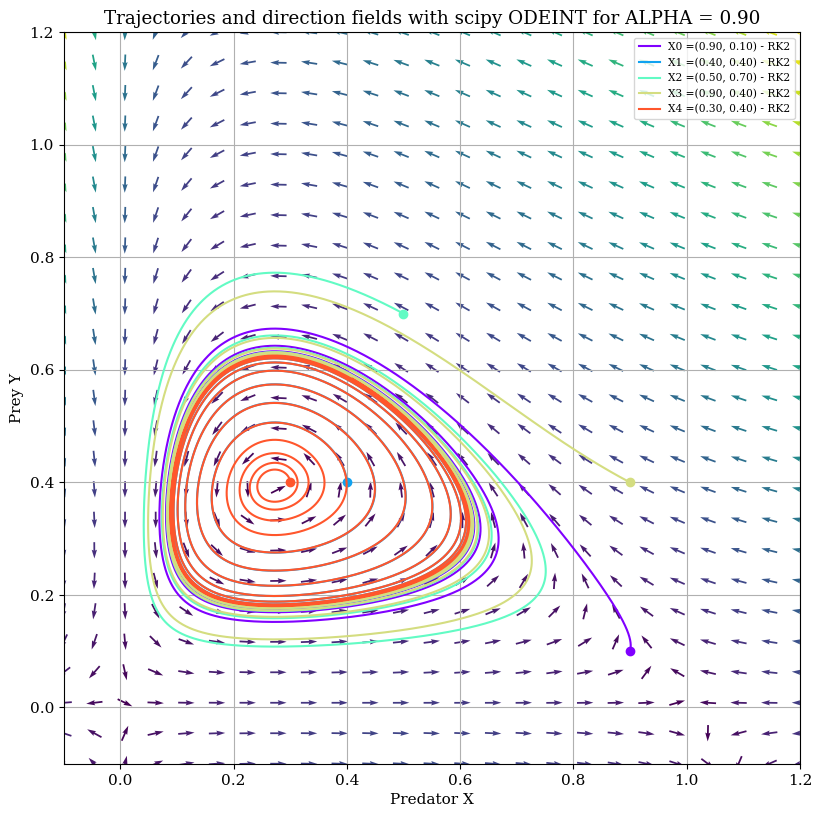

In [19]:
#Value
# Nx,Ny, number of point for the grid

## DEFAULT VALUE

#alpha = 0.35
#Nt = 1600
#tmax = 180.

# vector_assignement1(Nx, Ny, X0, X,  Y, alpha, t, coeff):
# Nx points for vector X
# Ny points for vector Y
# X0 points start
# X range of  xmin xmax for plot
# Y range of  ymin ymax for plot
# alpha is a variable of Sistem
# coeff is arbitrit value for give margin of graf is a positive value, best value is a delta X or Y
#Option 0 = ALL,  
#       1 = Euler, 
#       2 = RK2D, 
#       3 = odeint,
#       4 = Euler vs odeint
#       5 = RK2D vs odeint


Nt = 1600                       # for Odeint, number of step
tmax = 180.                     # T time max
dt = 0.01                        # for numerical dt step
t = np.linspace(0., tmax, Nt)   # for Odeint array of dt

x_min = 0.1
x_max = 1.0
y_min = 0.1
y_max = 1.0

coeff = 0.2
o = 2

Nx = 25
Ny = 25

X  = [x_min, x_max ]
Y  = [y_min, y_max]

X0 = [[0.9, 0.1],[0.4, 0.4],[0.5, 0.7],[0.9, 0.4],[0.3,0.4]]
alpha = 0.9

vector_assignement4(Nx, Ny, X0, X,  Y, alpha, t, Nt, tmax, dt, coeff, o)

## Assignment 5

Now that we are confident of the quality of our code, we should explore the interval of the $\alpha$ parameter to locate the Hopf bifurcation(s).

To this end, modify the 2nd order evolution routine in order to check if the trajectory has converged to a fixed point (within some tolerance) or to a closed orbit.

This requires some *heuristics*. A possible strategy is to scan the values of $\alpha$ and  for each value perform a longer simulation, looking only at its last portion, and check the dispersion of the positions in the corresponding portion of the trajectory.

Once you have determined, for each $\alpha$ value considered, whether you have a fixed point or a orbit, please provide a 2-dimensional plot reproducing the figure 5.4.13 at [this page](https://faculty.sfasu.edu/judsontw/ode/html-20220730/nonlinear04.html) in which on the X axis you have the values of $\alpha$, and on the Y axis the quantity
$$
x_{stable} = \frac{0.15}{1 - 0.5 \alpha}
$$
representing the $x-$ coordinate of the stable solution.

Please use different colors for the portions of the curve corresponding to fixed points and for those corresponding to closed orbits.

In [20]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 11





%matplotlib inline

In [21]:
def x_stable(alpha):
    return 0.15 / (1 - (alpha * 0.5))


In [22]:
t0 = 0
T = 600
dt = 0.05
nt = int (T/dt)

last_nt = int(nt * 0.001)

alphas_values = np.linspace(0., 1.5, 200)

stable_p = np.empty(len(alphas_values))

X0 = [0.1, 0.1]

Xrk2,  Yrk2 = X0

# Whit this fuction i find the stable point when the last xpoint converge at same value.
# I use the allclose fuction by numpy
for i,alpha in enumerate (alphas_values):
          
    Xrk2, Yrk2 = u_rk2(t0, T, dt, X0 , alpha)
        
    if np.allclose(Xrk2[-last_nt : ], Xrk2[ -1 ], rtol = 1e-04) == True:     
        stable_p[i] = alpha    
    else:   
        stable_p[i] = -1
#print(stable_p)

Bifurcation start alpha = 0.39949749
Bifurcation end alpha = 1.25125628


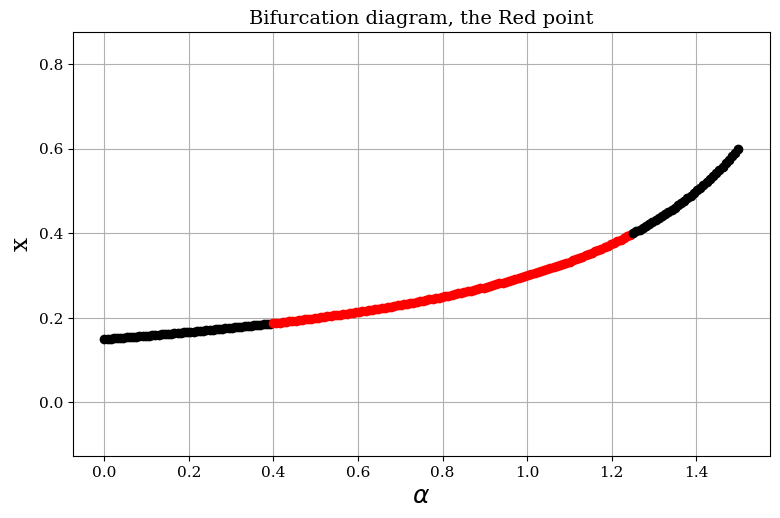

In [23]:
rcParams['figure.figsize'] = 9, 5.5
    

# plot using the matplotlib function loglog()
plt.figure()
plt.grid(True)
plt.title('Bifurcation diagram, the Red point',fontsize=14)
plt.xlabel(r'$\alpha $', fontsize=18)
plt.ylabel(r'x', fontsize=18)
plt.xlim(0., 1.5)
plt.ylim(0., 1)
plt.axis('equal')



### sto cercando di creare un grafico piu bello con le linee, piuttosto che con tanti punti.
flag = -1
red = np.array([[1.,1.],[1.,1.]])


for i, a in enumerate (alphas_values):
    x_s = x_stable(a)
    if stable_p[i] == -1:
        plt.plot(a, x_s, color='r', lw=1, marker='o');
        if flag == -1:
            print ('Bifurcation start alpha = %.8f' % (a))
            red[0] = (a, x_s)
            flag = 0
            
    else:
        plt.plot(a, x_s, color='k', lw=1, marker='o');
        if flag == 0:
            print ('Bifurcation end alpha = %.8f' % (a))
            red[1] = (a, x_s)
            flag = 1    